# ECE C247 - Neural Networks & Deep Learning, EEG Project
## Alexie Pogue, Amir Omidfar, Eric Peltola, Kenny Chen

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from models import *
from solver import *
from utils import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Parameters

In [0]:
LR      = 0.0005
BETAS   = (0.9, 0.999)
EPS     = 1e-08
DECAY   = 0.0005

BATCH_SIZE = 32
EPOCHS  = 100

# Data Setup

## Load Data

In [16]:
data_path = "/content/drive/Shared drives/ECE C247 Project/data/"

# load data files
X_train_valid, y_train_valid, X_test, y_test = load_data(data_path, subjects=[2], verbose=True)

Training/Valid data shape: (236, 22, 1000)
Test data shape: (50, 22, 1000)


## Preprocessing

In [0]:
# filter inputs
X_train_valid = filter_data(X_train_valid, fs=250, order=6, lowcut=7, highcut=30)
X_test = filter_data(X_test, fs=250, order=6, lowcut=7, highcut=30)

# smooth inputs
X_train_valid = smooth_data(X_train_valid, ws=5)
X_test = smooth_data(X_test, ws=5)

## PyTorch Dataloaders

In [0]:
# set up PyTorch dataloaders
data_loaders = dataloader_setup(X_train_valid, y_train_valid, X_test, y_test, batch_size=BATCH_SIZE)

# Model Comparison

## CNN

Training Progress: 	Epoch 1 [0/188 (0.00%)]		Loss: 1.44252
	Train loss: 0.04453, Accuracy: 48/188 (25.53%)
	Validation loss: 0.02894, Accuracy: 8/48 (16.67%)
	Test loss: 0.02755, Accuracy: 16/50 (32.00%)

Training Progress: 	Epoch 2 [0/188 (0.00%)]		Loss: 1.41781
	Train loss: 0.04429, Accuracy: 45/188 (23.94%)
	Validation loss: 0.02947, Accuracy: 9/48 (18.75%)
	Test loss: 0.02756, Accuracy: 14/50 (28.00%)

Training Progress: 	Epoch 3 [0/188 (0.00%)]		Loss: 1.31152
	Train loss: 0.04382, Accuracy: 47/188 (25.00%)
	Validation loss: 0.02955, Accuracy: 7/48 (14.58%)
	Test loss: 0.02770, Accuracy: 15/50 (30.00%)

Training Progress: 	Epoch 4 [0/188 (0.00%)]		Loss: 1.32997
	Train loss: 0.04389, Accuracy: 52/188 (27.66%)
	Validation loss: 0.02980, Accuracy: 11/48 (22.92%)
	Test loss: 0.02779, Accuracy: 15/50 (30.00%)

Training Progress: 	Epoch 5 [0/188 (0.00%)]		Loss: 1.34838
	Train loss: 0.04362, Accuracy: 53/188 (28.19%)
	Validation loss: 0.02970, Accuracy: 15/48 (31.25%)
	Test loss: 0.02777,

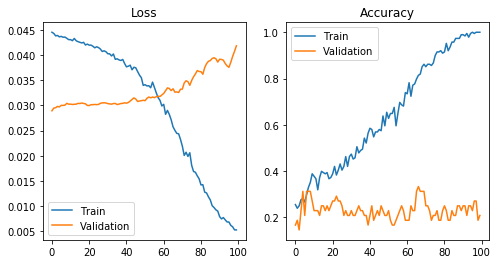

In [19]:
model = CNN().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

## LSTM

Training Progress: 	Epoch 1 [0/188 (0.00%)]		Loss: 1.56667
	Train loss: 0.04426, Accuracy: 48/188 (25.53%)
	Validation loss: 0.02921, Accuracy: 10/48 (20.83%)
	Test loss: 0.02777, Accuracy: 8/50 (16.00%)

Training Progress: 	Epoch 2 [0/188 (0.00%)]		Loss: 1.48623
	Train loss: 0.04437, Accuracy: 42/188 (22.34%)
	Validation loss: 0.02904, Accuracy: 15/48 (31.25%)
	Test loss: 0.02784, Accuracy: 13/50 (26.00%)

Training Progress: 	Epoch 3 [0/188 (0.00%)]		Loss: 1.44535
	Train loss: 0.04427, Accuracy: 42/188 (22.34%)
	Validation loss: 0.02902, Accuracy: 14/48 (29.17%)
	Test loss: 0.02784, Accuracy: 13/50 (26.00%)

Training Progress: 	Epoch 4 [0/188 (0.00%)]		Loss: 1.39048
	Train loss: 0.04402, Accuracy: 52/188 (27.66%)
	Validation loss: 0.02906, Accuracy: 13/48 (27.08%)
	Test loss: 0.02775, Accuracy: 14/50 (28.00%)

Training Progress: 	Epoch 5 [0/188 (0.00%)]		Loss: 1.41355
	Train loss: 0.04335, Accuracy: 56/188 (29.79%)
	Validation loss: 0.02920, Accuracy: 11/48 (22.92%)
	Test loss: 0.0276

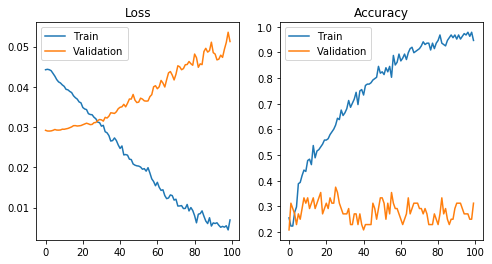

In [20]:
model = LSTM().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

## GRU

Training Progress: 	Epoch 1 [0/188 (0.00%)]		Loss: 1.43131
	Train loss: 0.04440, Accuracy: 45/188 (23.94%)
	Validation loss: 0.02884, Accuracy: 15/48 (31.25%)
	Test loss: 0.02764, Accuracy: 13/50 (26.00%)

Training Progress: 	Epoch 2 [0/188 (0.00%)]		Loss: 1.47566
	Train loss: 0.04421, Accuracy: 51/188 (27.13%)
	Validation loss: 0.02894, Accuracy: 15/48 (31.25%)
	Test loss: 0.02764, Accuracy: 14/50 (28.00%)

Training Progress: 	Epoch 3 [0/188 (0.00%)]		Loss: 1.37760
	Train loss: 0.04367, Accuracy: 58/188 (30.85%)
	Validation loss: 0.02903, Accuracy: 14/48 (29.17%)
	Test loss: 0.02773, Accuracy: 15/50 (30.00%)

Training Progress: 	Epoch 4 [0/188 (0.00%)]		Loss: 1.40540
	Train loss: 0.04299, Accuracy: 71/188 (37.77%)
	Validation loss: 0.02930, Accuracy: 13/48 (27.08%)
	Test loss: 0.02766, Accuracy: 13/50 (26.00%)

Training Progress: 	Epoch 5 [0/188 (0.00%)]		Loss: 1.41066
	Train loss: 0.04238, Accuracy: 76/188 (40.43%)
	Validation loss: 0.02929, Accuracy: 15/48 (31.25%)
	Test loss: 0.027

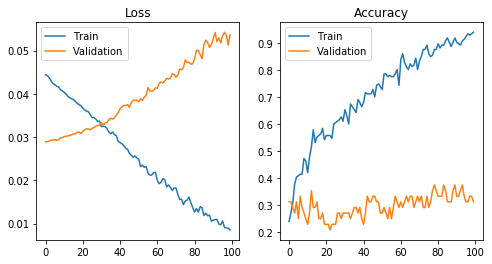

In [21]:
model = GRU().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

## CNN + LSTM

Training Progress: 	Epoch 1 [0/188 (0.00%)]		Loss: 1.37852
	Train loss: 0.04417, Accuracy: 51/188 (27.13%)
	Validation loss: 0.02902, Accuracy: 11/48 (22.92%)
	Test loss: 0.02783, Accuracy: 10/50 (20.00%)

Training Progress: 	Epoch 2 [0/188 (0.00%)]		Loss: 1.37426
	Train loss: 0.04416, Accuracy: 51/188 (27.13%)
	Validation loss: 0.02906, Accuracy: 11/48 (22.92%)
	Test loss: 0.02783, Accuracy: 10/50 (20.00%)

Training Progress: 	Epoch 3 [0/188 (0.00%)]		Loss: 1.36937
	Train loss: 0.04415, Accuracy: 51/188 (27.13%)
	Validation loss: 0.02910, Accuracy: 11/48 (22.92%)
	Test loss: 0.02782, Accuracy: 10/50 (20.00%)

Training Progress: 	Epoch 4 [0/188 (0.00%)]		Loss: 1.36942
	Train loss: 0.04414, Accuracy: 51/188 (27.13%)
	Validation loss: 0.02914, Accuracy: 11/48 (22.92%)
	Test loss: 0.02782, Accuracy: 10/50 (20.00%)

Training Progress: 	Epoch 5 [0/188 (0.00%)]		Loss: 1.36692
	Train loss: 0.04413, Accuracy: 51/188 (27.13%)
	Validation loss: 0.02917, Accuracy: 11/48 (22.92%)
	Test loss: 0.027

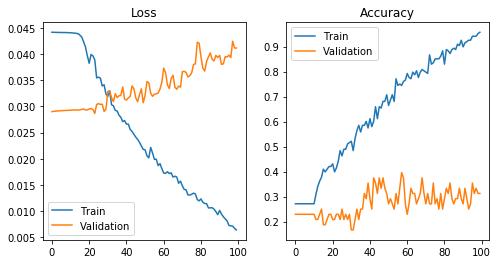

In [22]:
model = CNN_LSTM().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

## CNN + GRU

Training Progress: 	Epoch 1 [0/189 (0.00%)]		Loss: 1.40443
	Train loss: 0.04397, Accuracy: 54/189 (28.57%)
	Validation loss: 0.02897, Accuracy: 12/48 (25.00%)
	Test loss: 0.02770, Accuracy: 15/50 (30.00%)

Training Progress: 	Epoch 2 [0/189 (0.00%)]		Loss: 1.37999
	Train loss: 0.04379, Accuracy: 67/189 (35.45%)
	Validation loss: 0.02867, Accuracy: 17/48 (35.42%)
	Test loss: 0.02762, Accuracy: 15/50 (30.00%)

Training Progress: 	Epoch 3 [0/189 (0.00%)]		Loss: 1.37990
	Train loss: 0.04287, Accuracy: 73/189 (38.62%)
	Validation loss: 0.02779, Accuracy: 19/48 (39.58%)
	Test loss: 0.02712, Accuracy: 15/50 (30.00%)

Training Progress: 	Epoch 4 [0/189 (0.00%)]		Loss: 1.35690
	Train loss: 0.03971, Accuracy: 93/189 (49.21%)
	Validation loss: 0.02537, Accuracy: 20/48 (41.67%)
	Test loss: 0.02531, Accuracy: 20/50 (40.00%)

Training Progress: 	Epoch 5 [0/189 (0.00%)]		Loss: 1.27150
	Train loss: 0.03506, Accuracy: 95/189 (50.26%)
	Validation loss: 0.02217, Accuracy: 23/48 (47.92%)
	Test loss: 0.022

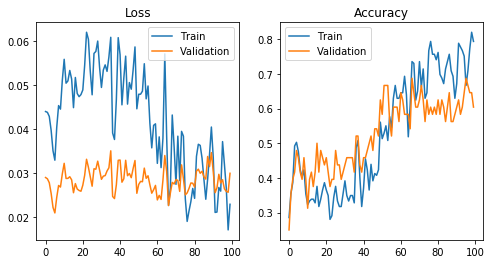

In [13]:
model = CNN_GRU().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)